In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
dataset = load_iris()
x = dataset.data
y=dataset.target

In [3]:
from  sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)

In [4]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2,random_state=42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [5]:
preds = clf.predict_proba(x_test)

In [6]:
from sklearn.metrics import accuracy_score

print(f"Accuracy Score without PCA: {accuracy_score(y_test,preds.argmax(axis=1)):.2f}")

Accuracy Score without PCA: 0.89


In [7]:
pca = PCA(n_components=2)
x_centered = x - x.mean(axis=0)
pca.fit(x_centered)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
x_pca = pca.transform(x_centered)

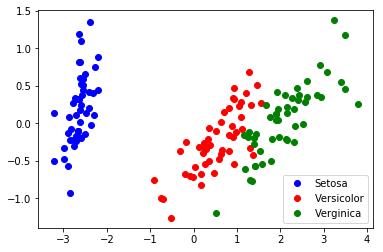

In [9]:
plt.plot(x_pca[y==0,0],x_pca[y==0,1],'bo',label="Setosa")
plt.plot(x_pca[y==1,0],x_pca[y==1,1],'ro',label="Versicolor")
plt.plot(x_pca[y==2,0],x_pca[y==2,1],'go',label="Verginica")
plt.legend()

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.3,stratify=y,random_state=42)
clf = DecisionTreeClassifier(max_depth=2,random_state=42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [11]:
preds = clf.predict_proba(x_test).argmax(axis=1)
print(f"Accuracy score without PCA: {accuracy_score(y_test, preds):.2f}")

Accuracy score without PCA: 0.91
